In [16]:
import pandas as pd
from analysis.classes import Country


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [17]:
country = Country('israel')
df = country.data  # Pandas df object, that contains the data from the db.


In [18]:
print("Part 1: Intro")
print(country)

Part 1: Intro

Countries name: Israel
Countries id: 30
Continent: Asia
Continent id: 3
Population: 9197590
First update: 2020-08-02
Last update: 2020-11-20
Data number of rows: 96
Data number of columns: 18
Columns: 
['scrap_date', 'scrap_time', 'update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [19]:
print(df.head(5))

  scrap_date scrap_time update_time_GMT  Country_id Country  Population  \
0 2020-08-02   20:00:00             NaN          30  Israel     9197590   
1 2020-08-08   20:00:00             NaN          30  Israel     9197590   
2 2020-08-12   20:00:00             NaN          30  Israel     9197590   
3 2020-08-16   20:00:00             NaN          30  Israel     9197590   
4 2020-08-17   20:00:00             NaN          30  Israel     9197590   

   TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  \
0       72315       NaN          531        NaN           45631           NaN   
1       82279    9964.0          592       61.0           57068       11437.0   
2       87173    4894.0          633       41.0           61577        4509.0   
3       92404    5231.0          679       46.0           68400        6823.0   
4       94277    1873.0          692       13.0           70267        1867.0   

   ActiveCases  SeriousCritical  Tot_Cases_1Mpop  Deaths_1Mpop

In [20]:
print(df.dtypes,'\n')

scrap_date         datetime64[ns]
scrap_time                 object
update_time_GMT            object
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object 



In [21]:
print('Number of null values are:\n',df.isnull().sum())

Number of null values are:
 scrap_date          0
scrap_time          0
update_time_GMT    59
Country_id          0
Country             0
Population          0
TotalCases          0
NewCases            1
TotalDeaths         0
NewDeaths           1
TotalRecovered      0
NewRecovered        1
ActiveCases         0
SeriousCritical     0
Tot_Cases_1Mpop     0
Deaths_1Mpop        0
TotalTests          0
Tests_1Mpop         0
dtype: int64


In [22]:
print("Part 2: Basic exploring")
print("Q1.Find the date of the day with the highest New Cases.")
date = df[df['NewCases'] == df['NewCases'].max()]['scrap_date'].dt.date
print('Answer:\n', date, '\n')

Part 2: Basic exploring
Q1.Find the date of the day with the highest New Cases.
Answer:
 42    2020-09-27
Name: scrap_date, dtype: object 



Q2.Visualize the cumulative data.


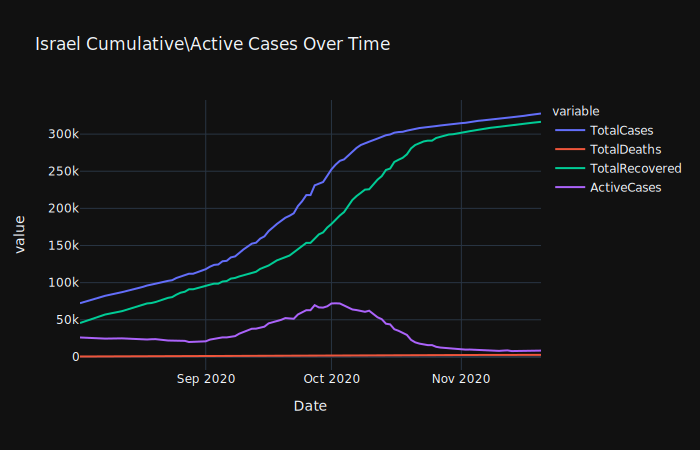

In [23]:
print("Q2.Visualize the cumulative data.")
fig = country.linear_plot(['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases'])
fig.show()

Q3.Visualize the data for October
Total time taken in monthly_plot function is: 0.0017166666666666665 minutes.


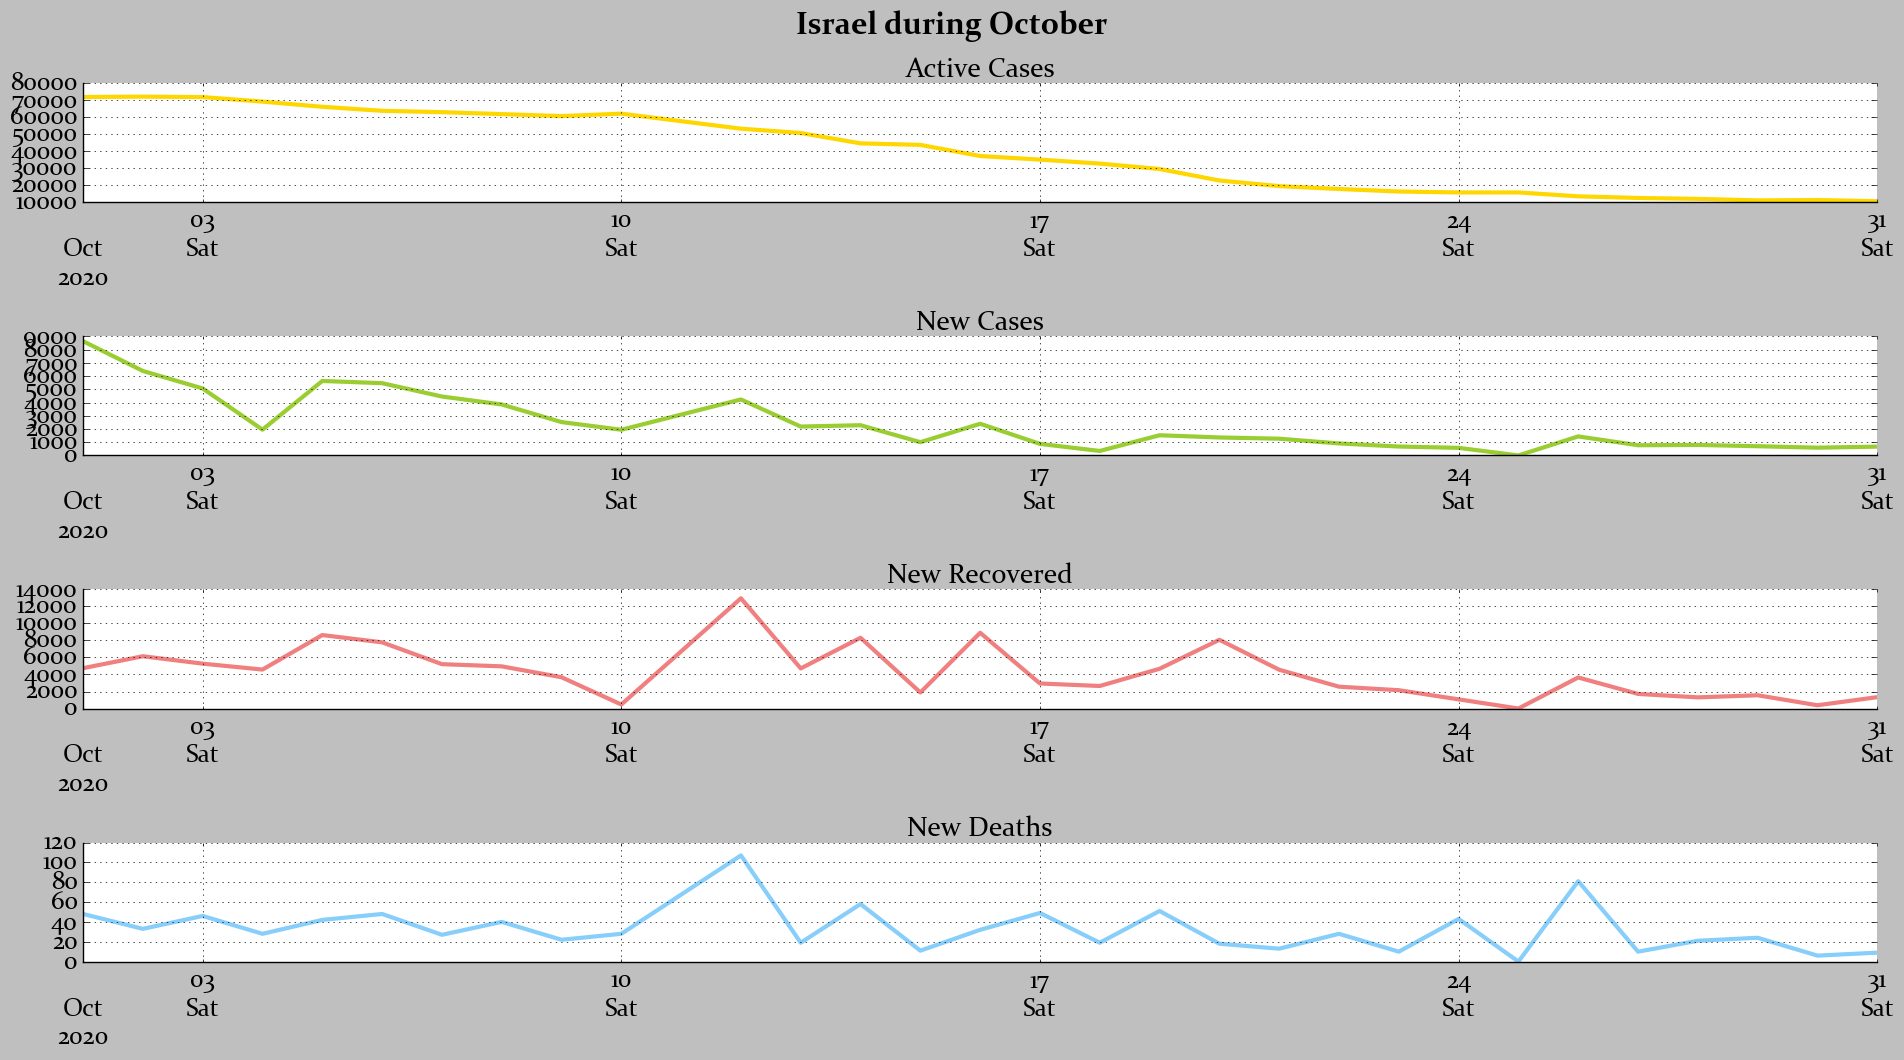

In [24]:
print("Q3.Visualize the data for October")
country.monthly_plot(['ActiveCases','NewCases','NewRecovered','NewDeaths'],10,2020)

Q4.Find the countries daily increases in death,recoveries,active cases,new cases
Total time taken in daily_increase function is: 0.011016666666666668 minutes.
Answer:
 91   -0.818182
92    0.000000
93    0.000000
94    1.000000
95   -0.500000
Name: NewDeaths, dtype: float64 



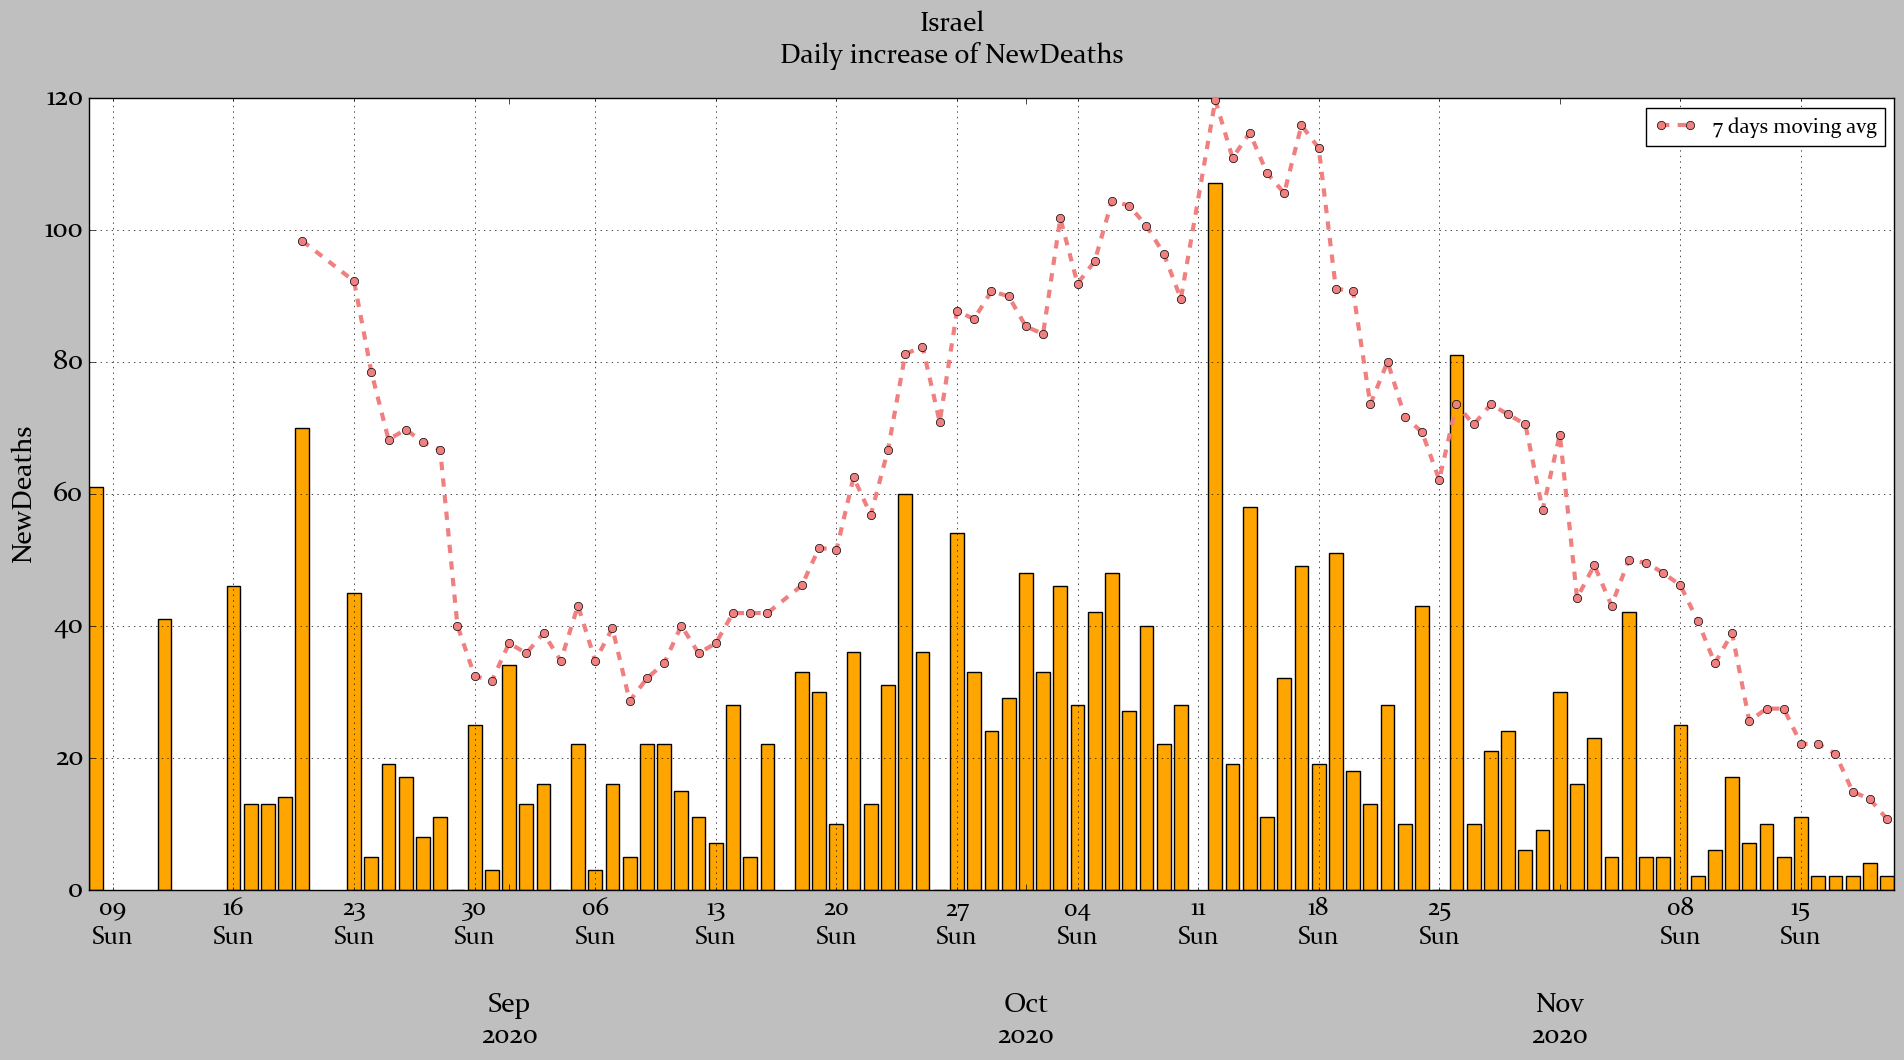

In [25]:
print("Q4.Find the countries daily increases in death,recoveries,active cases,new cases")
death_rate = df['NewDeaths'].pct_change()
country.daily_increase('NewDeaths', save = True)
print('Answer:\n', death_rate.tail(5), '\n')

Total time taken in daily_increase function is: 0.010366666666666666 minutes.
Answer:
 91   -0.127152
92   -0.071320
93    0.083333
94   -0.070890
95   -0.003247
Name: NewRecovered, dtype: float64 



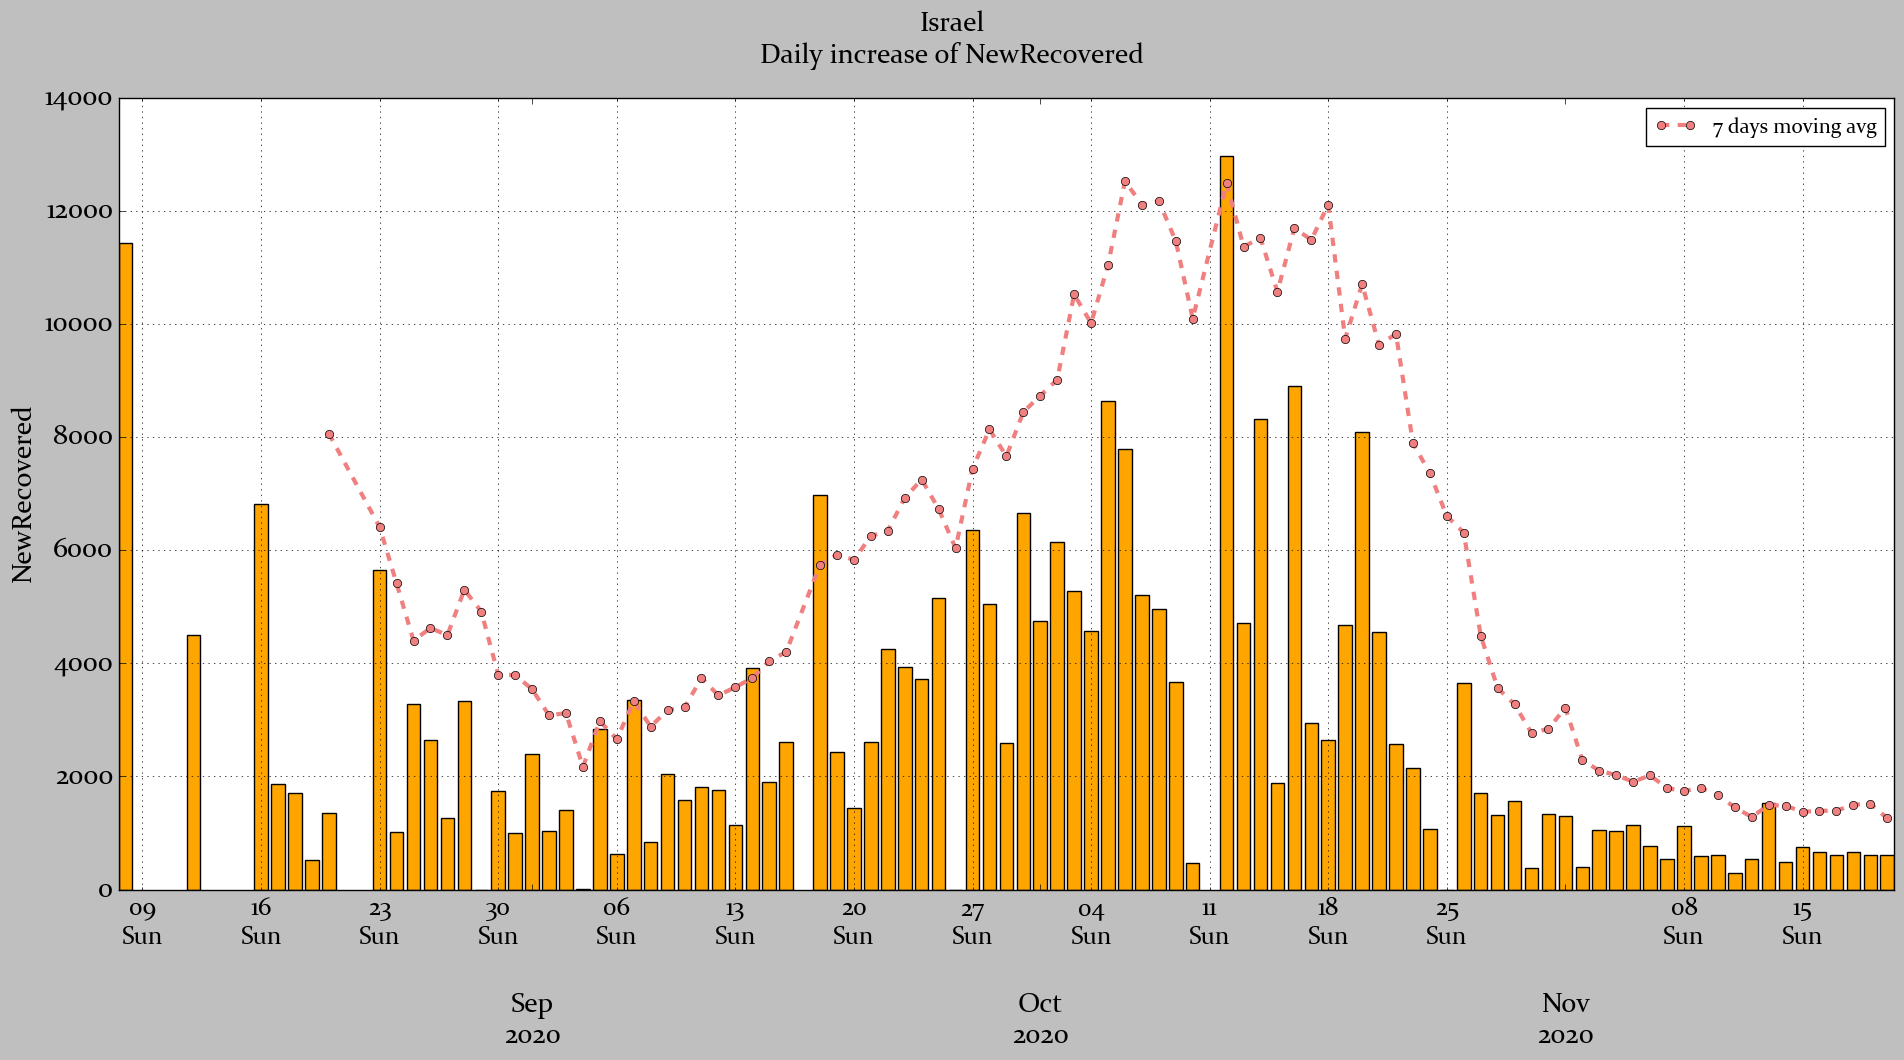

In [26]:
recovered_rate = df['NewRecovered'].pct_change()
country.daily_increase('NewRecovered', save = True)
print('Answer:\n', recovered_rate.tail(5), '\n')

Total time taken in daily_increase function is: 0.0125 minutes.
Answer:
 91    1.246269
92   -0.011074
93   -0.257559
94    0.280543
95   -0.176678
Name: NewCases, dtype: float64 



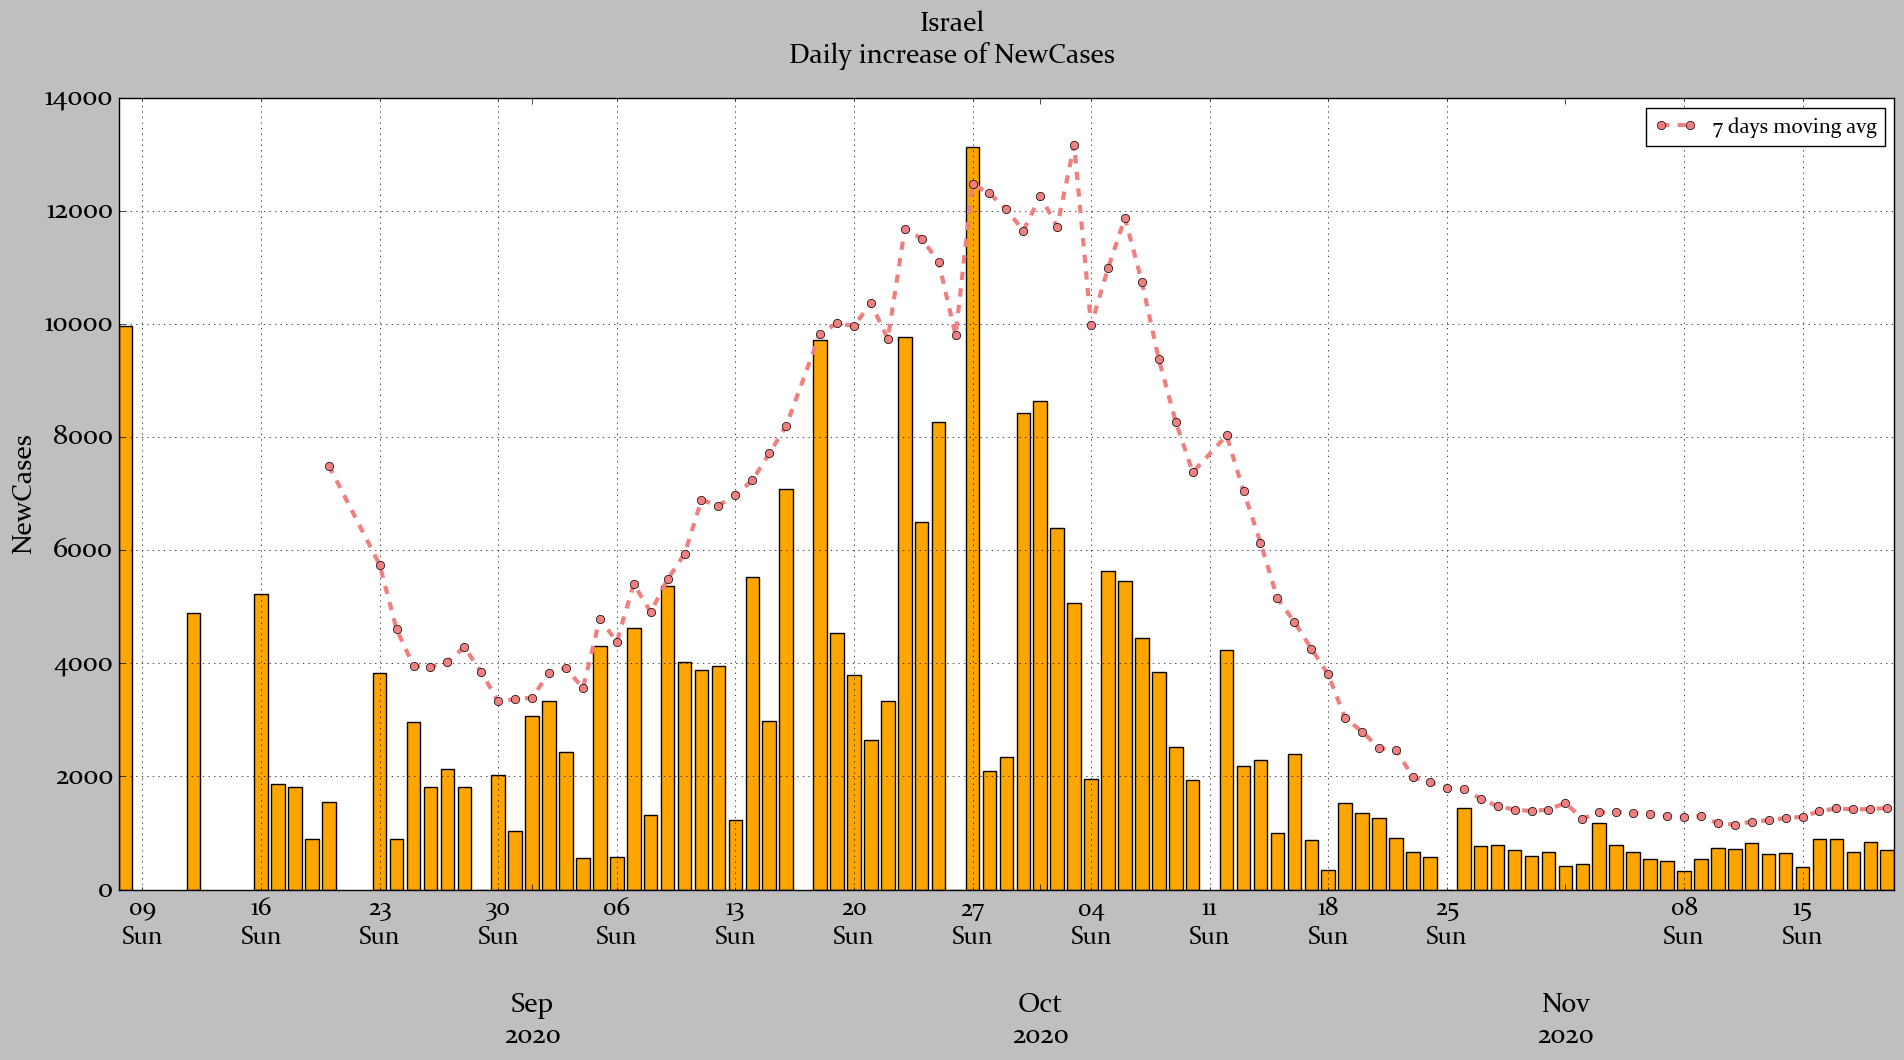

In [27]:
newcase_rate = df['NewCases'].pct_change()
country.daily_increase('NewCases', save = True)
print('Answer:\n', newcase_rate.tail(5), '\n')

Total time taken in daily_increase function is: 0.0104 minutes.
Answer:
 91    0.031721
92    0.035447
93   -0.000245
94    0.028105
95    0.009908
Name: ActiveCases, dtype: float64 



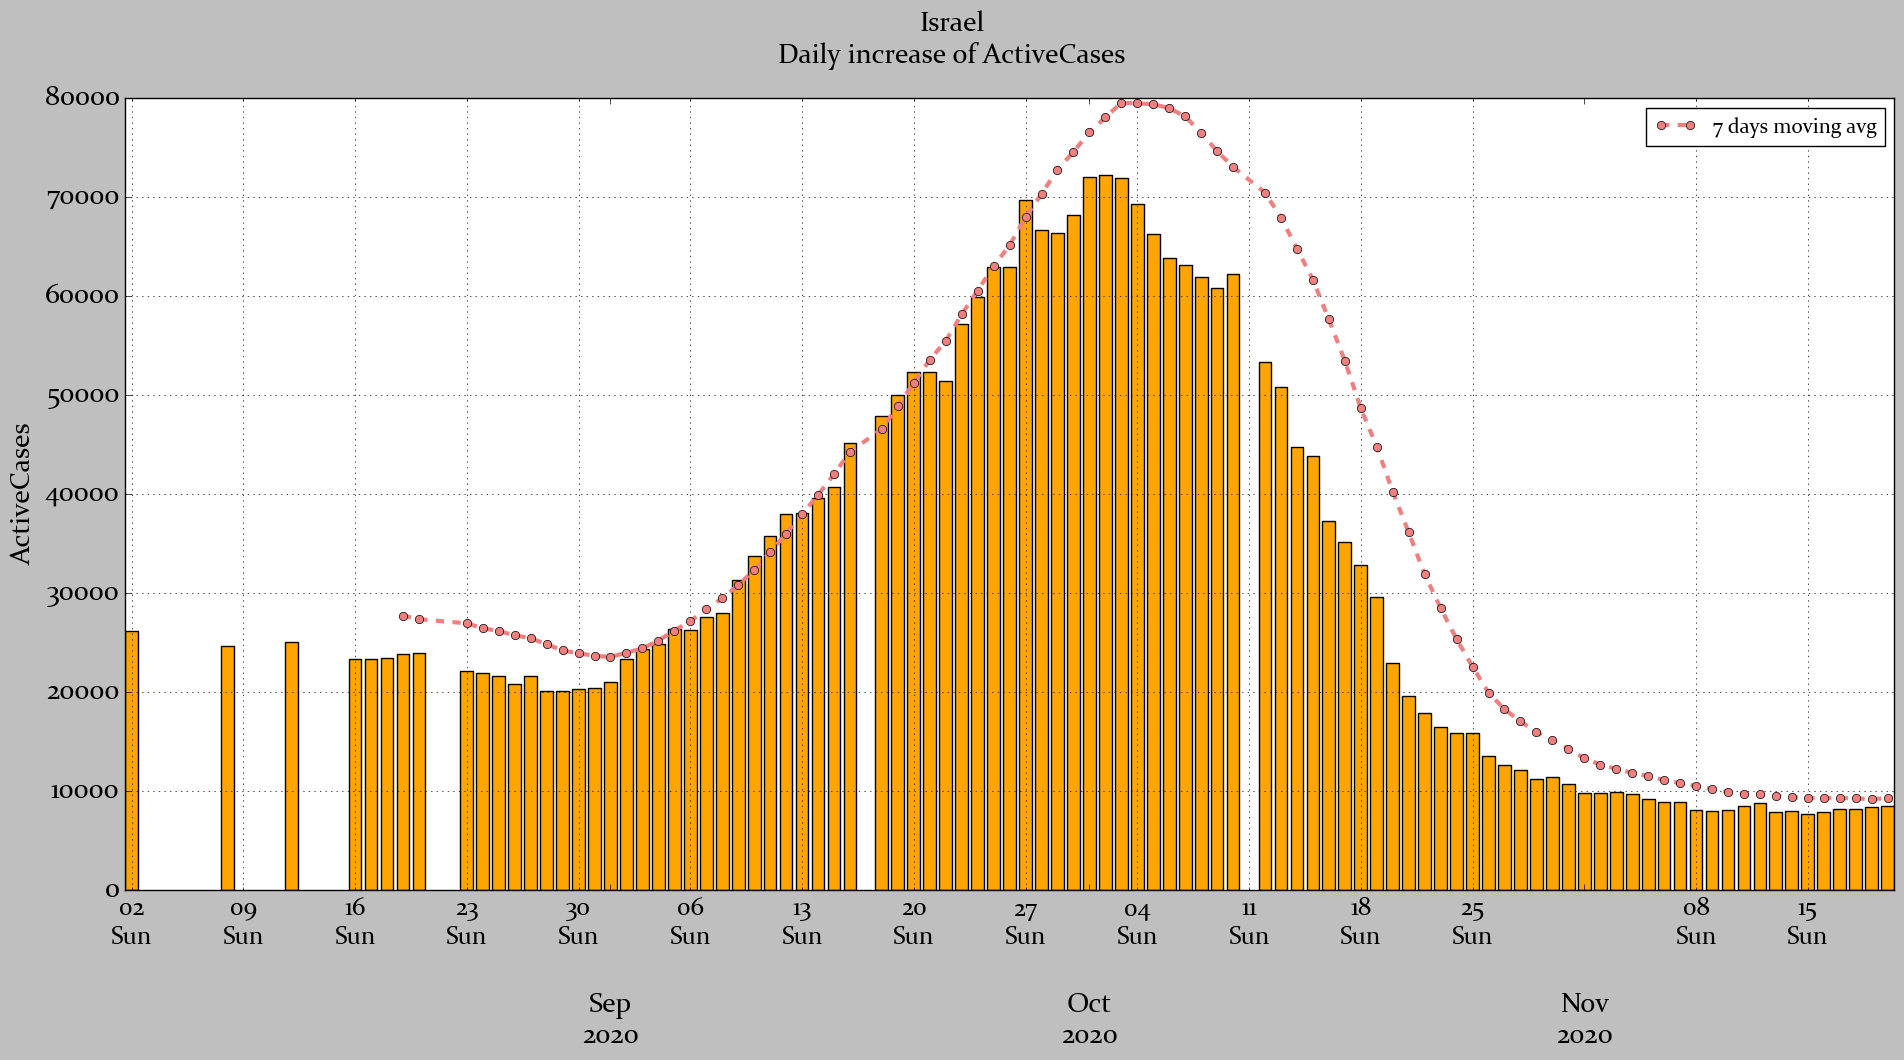

In [28]:
activeCases_rate = df['ActiveCases'].pct_change()
country.daily_increase('ActiveCases', save = True)
print('Answer:\n', activeCases_rate.tail(5), '\n')

Q5.Find closed cases ratio (TotalRecovered + TotalDeaths = TotalCases - ActiveCases)
Total time taken in closed_cases_pie function is: 0.0005 minutes.
Answer:
    TotalRecovered TotalDeaths
95        99.141%      0.859% 



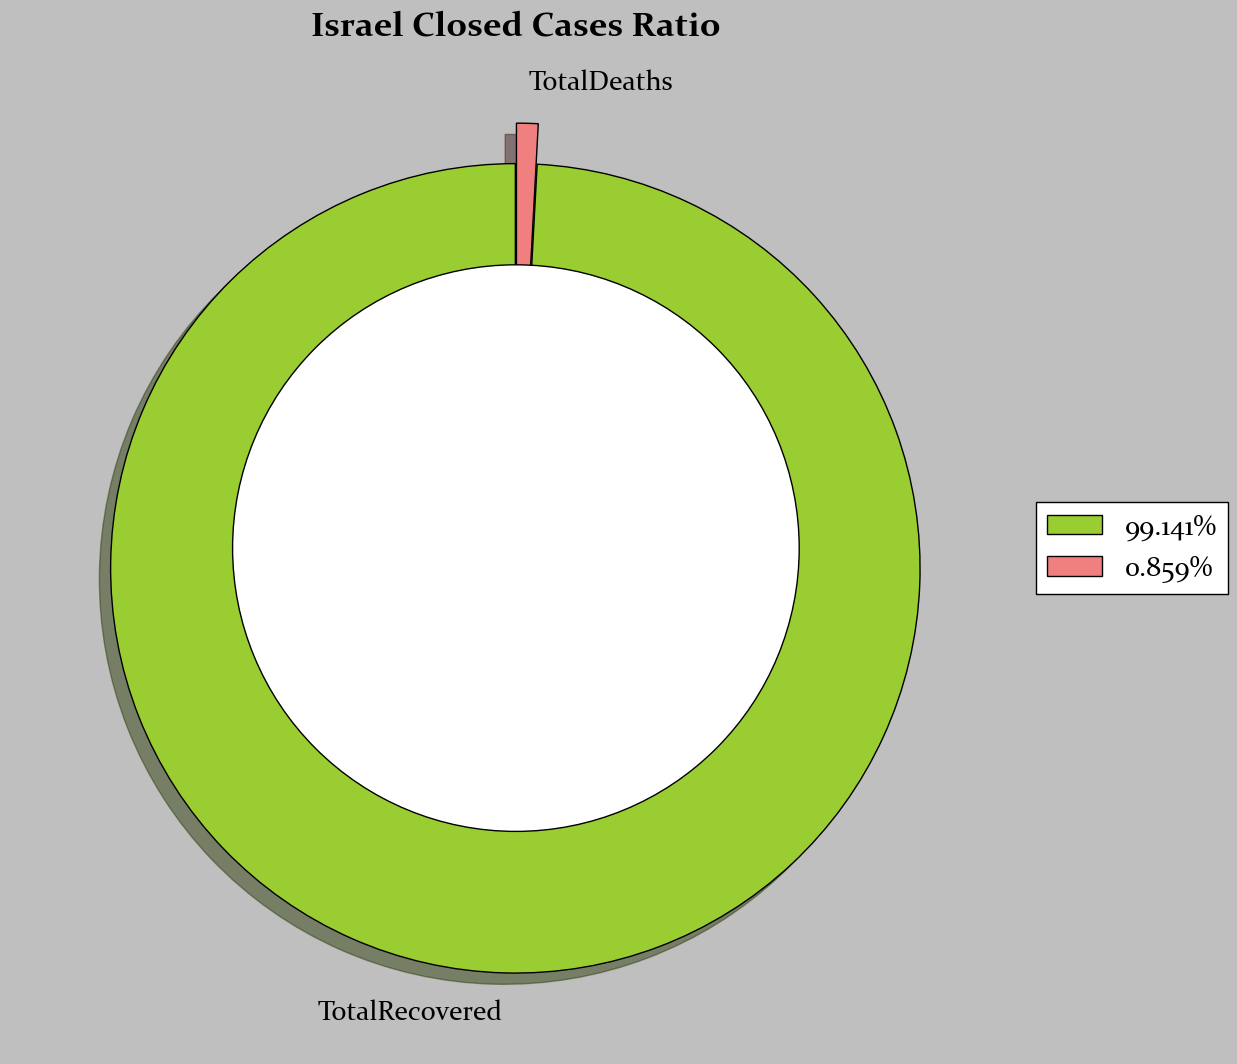

In [29]:
print("Q5.Find closed cases ratio (TotalRecovered + TotalDeaths = TotalCases - ActiveCases)")
updated_totals = df[df['scrap_date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
country.closed_cases_pie(save = False)
print('Answer:\n', res, '\n')

In [30]:
print("Q6.Find the countries Case Fatality Ratio")
print('Answer:\n', country.case_fatality_ratio().astype('str') + '%', '\n')

Q6.Find the countries Case Fatality Ratio
Answer:
 0.87% 

